# So here is how you can use the Python computer language and machine learning to predict the car price. The car price depends on several factors

In [75]:
import pandas as pd # you can use this for data analysis, data manipulation, and cleaning of data
import numpy as np # It is a popular machine learning library that supports large matrices and multi-dimensional data
import matplotlib.pyplot as plt #you can use Matplotlib to create plots, and  other visualization charts you want 
import seaborn as sns # Python data visualization library based on matplotlib

In [2]:
df = pd.read_csv('C:/Users/RAMA/Downloads/cars.csv')

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
df["cylindernumber"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

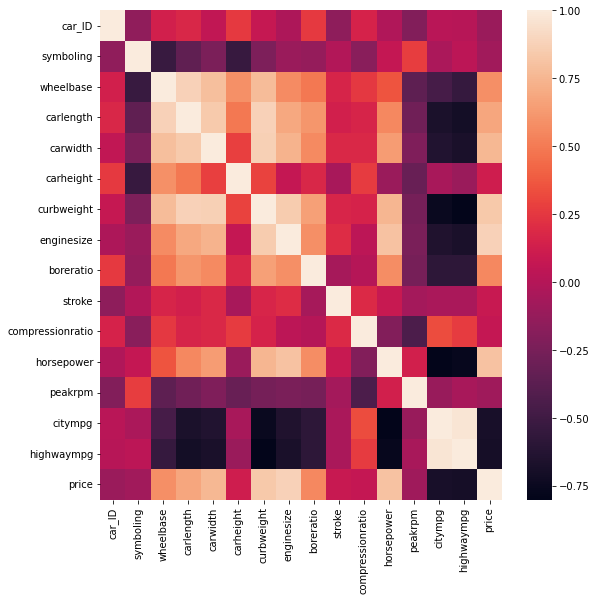

In [11]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())
plt.show()

C:\Users\RAMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


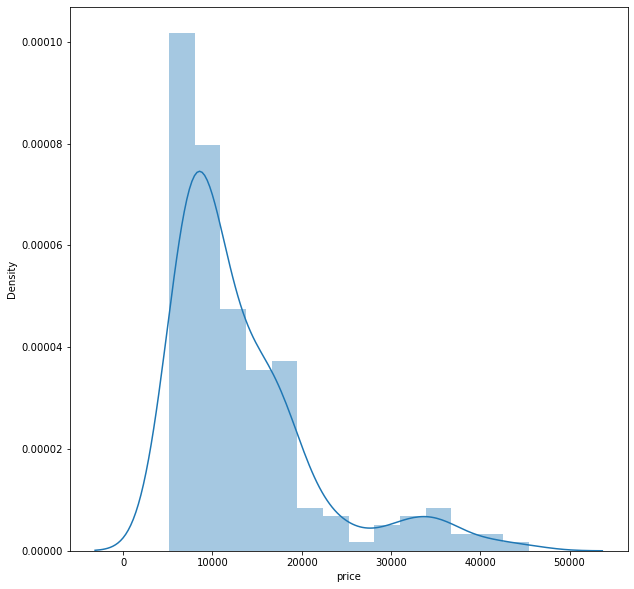

In [12]:

plt.figure(figsize=(10, 10))
sns.distplot(df.price)
plt.show()

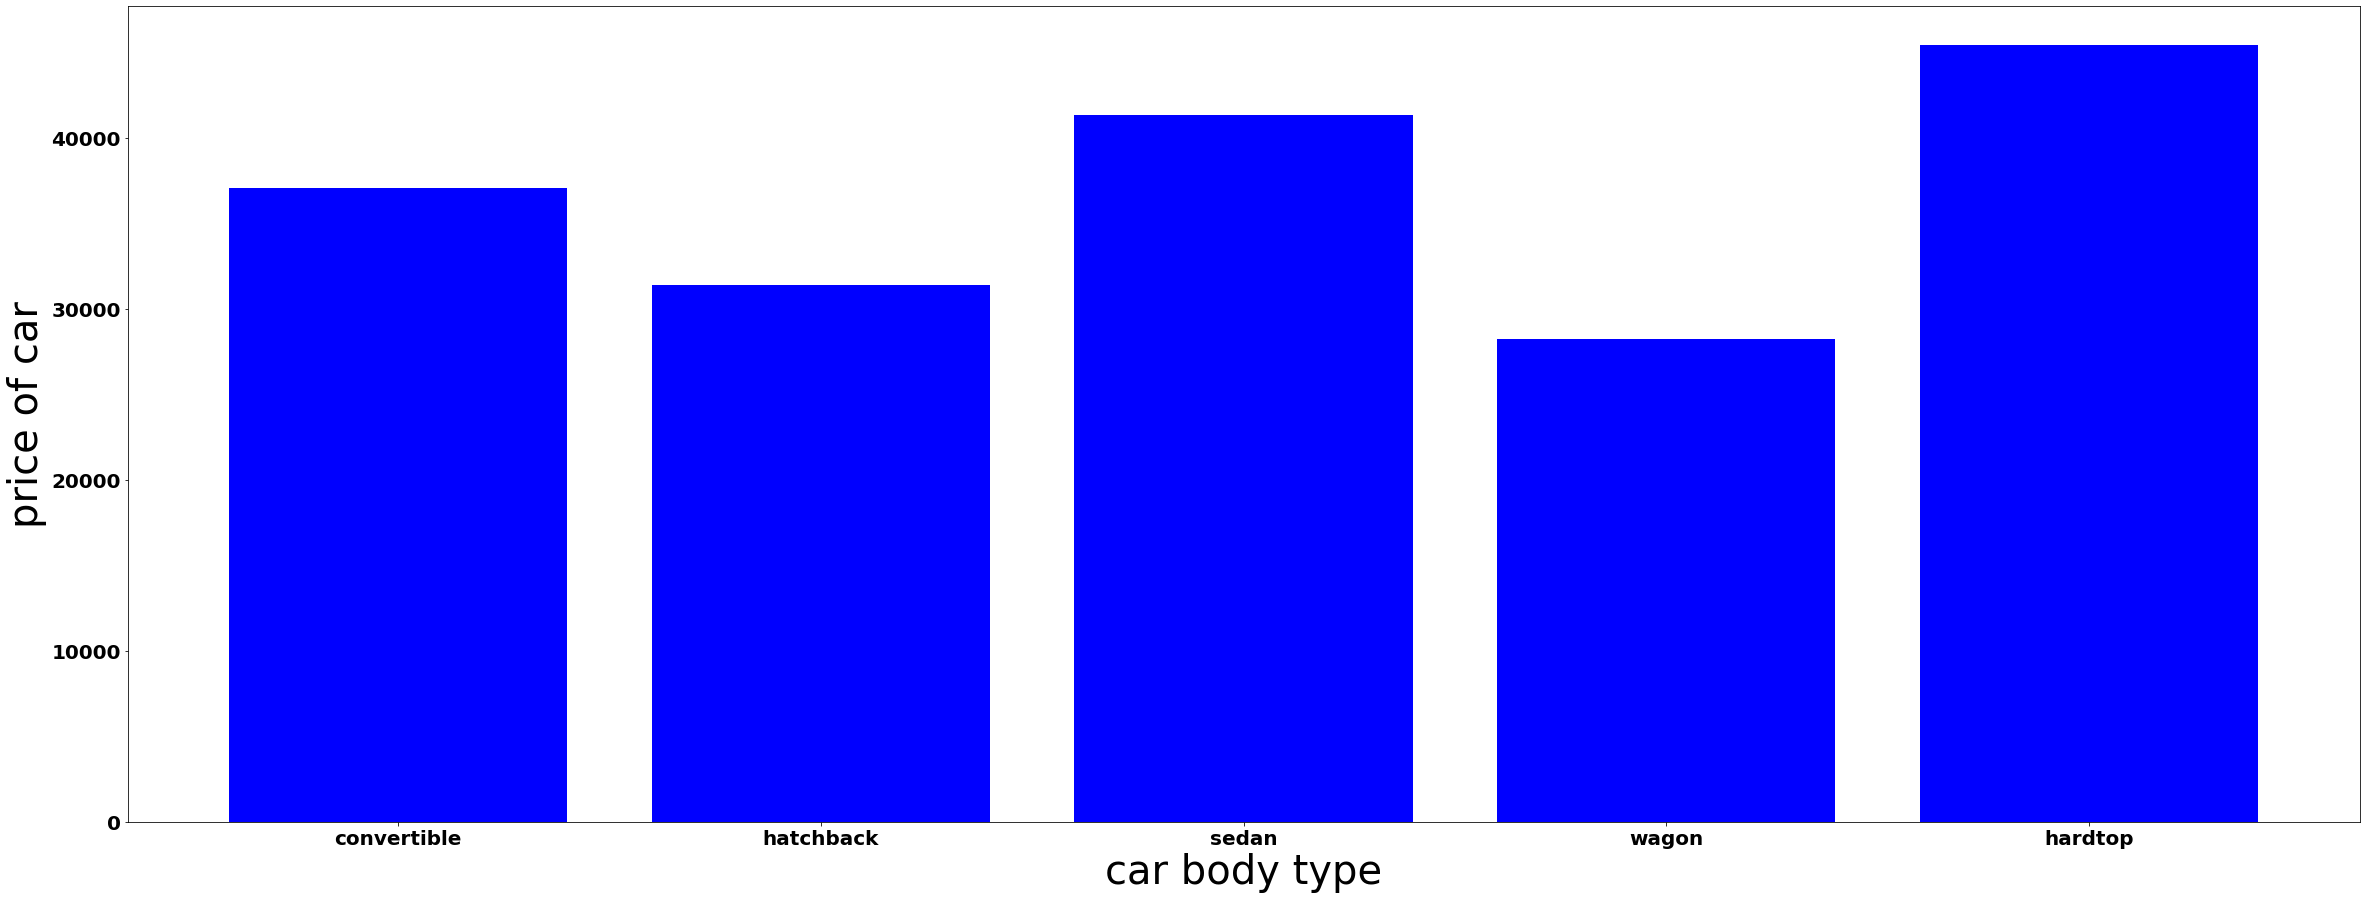

In [13]:
data = pd.DataFrame(df)
y=data['price']
x=data['carbody']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("car body type",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x,y, color='b',align='center')
plt.show()

Text(0, 0.5, 'price of car')

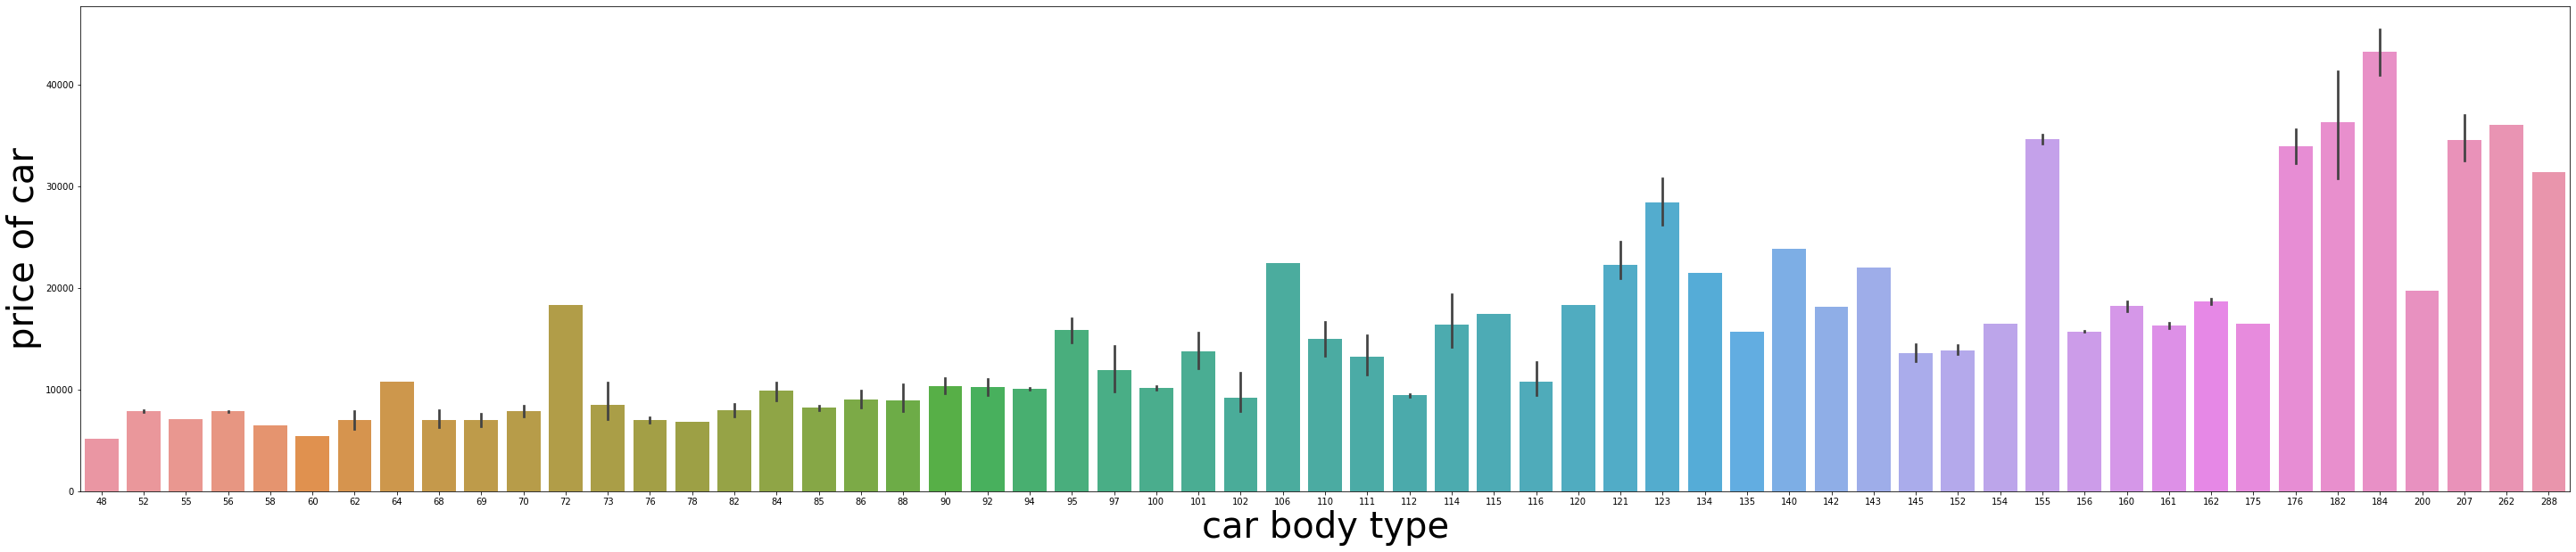

In [14]:
plt.figure(figsize=(50,10))
sns.barplot(data=df,x='horsepower',y='price')
plt.xlabel("car body type",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)

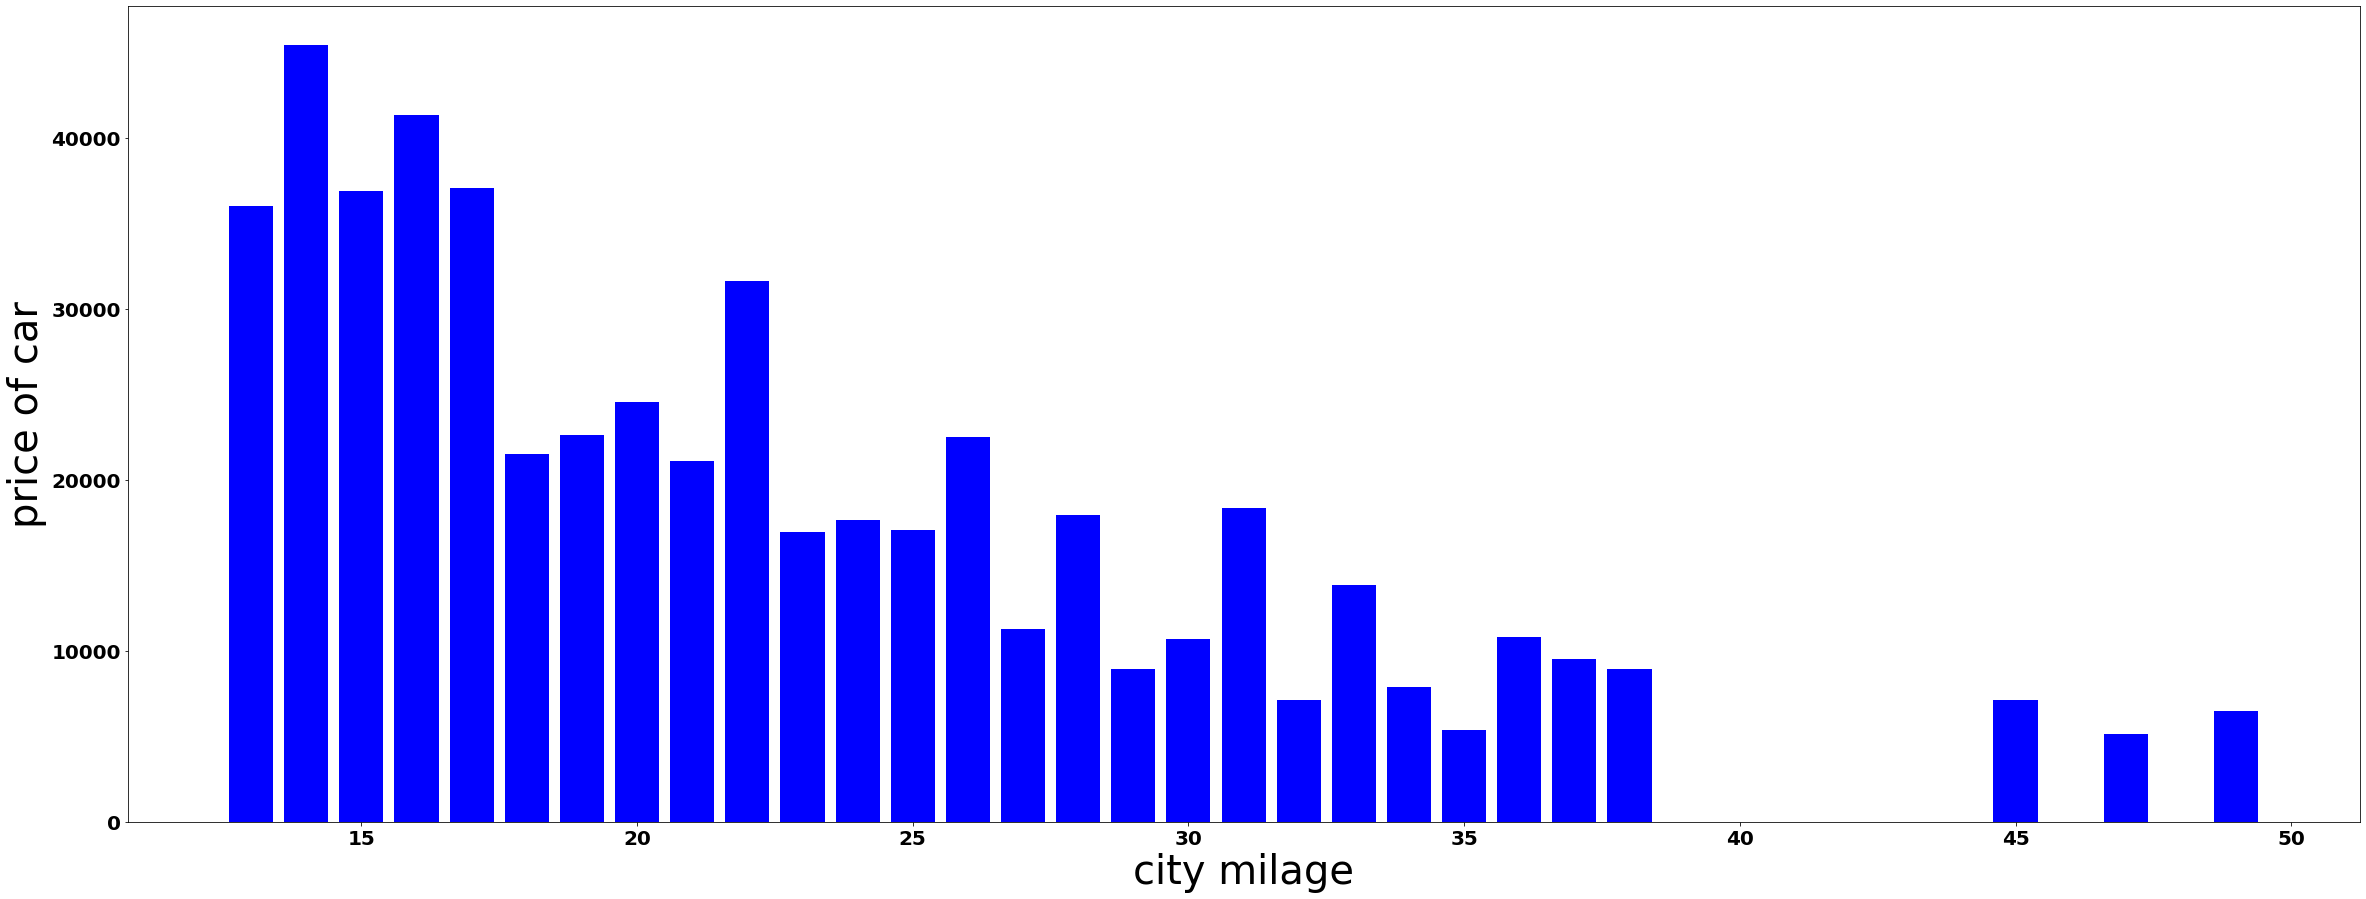

In [15]:
data = pd.DataFrame(df)
y=data['price']
x=data['citympg']
x1 = data['highwaympg']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("city milage",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x,y, color='b',align='center')
plt.show()

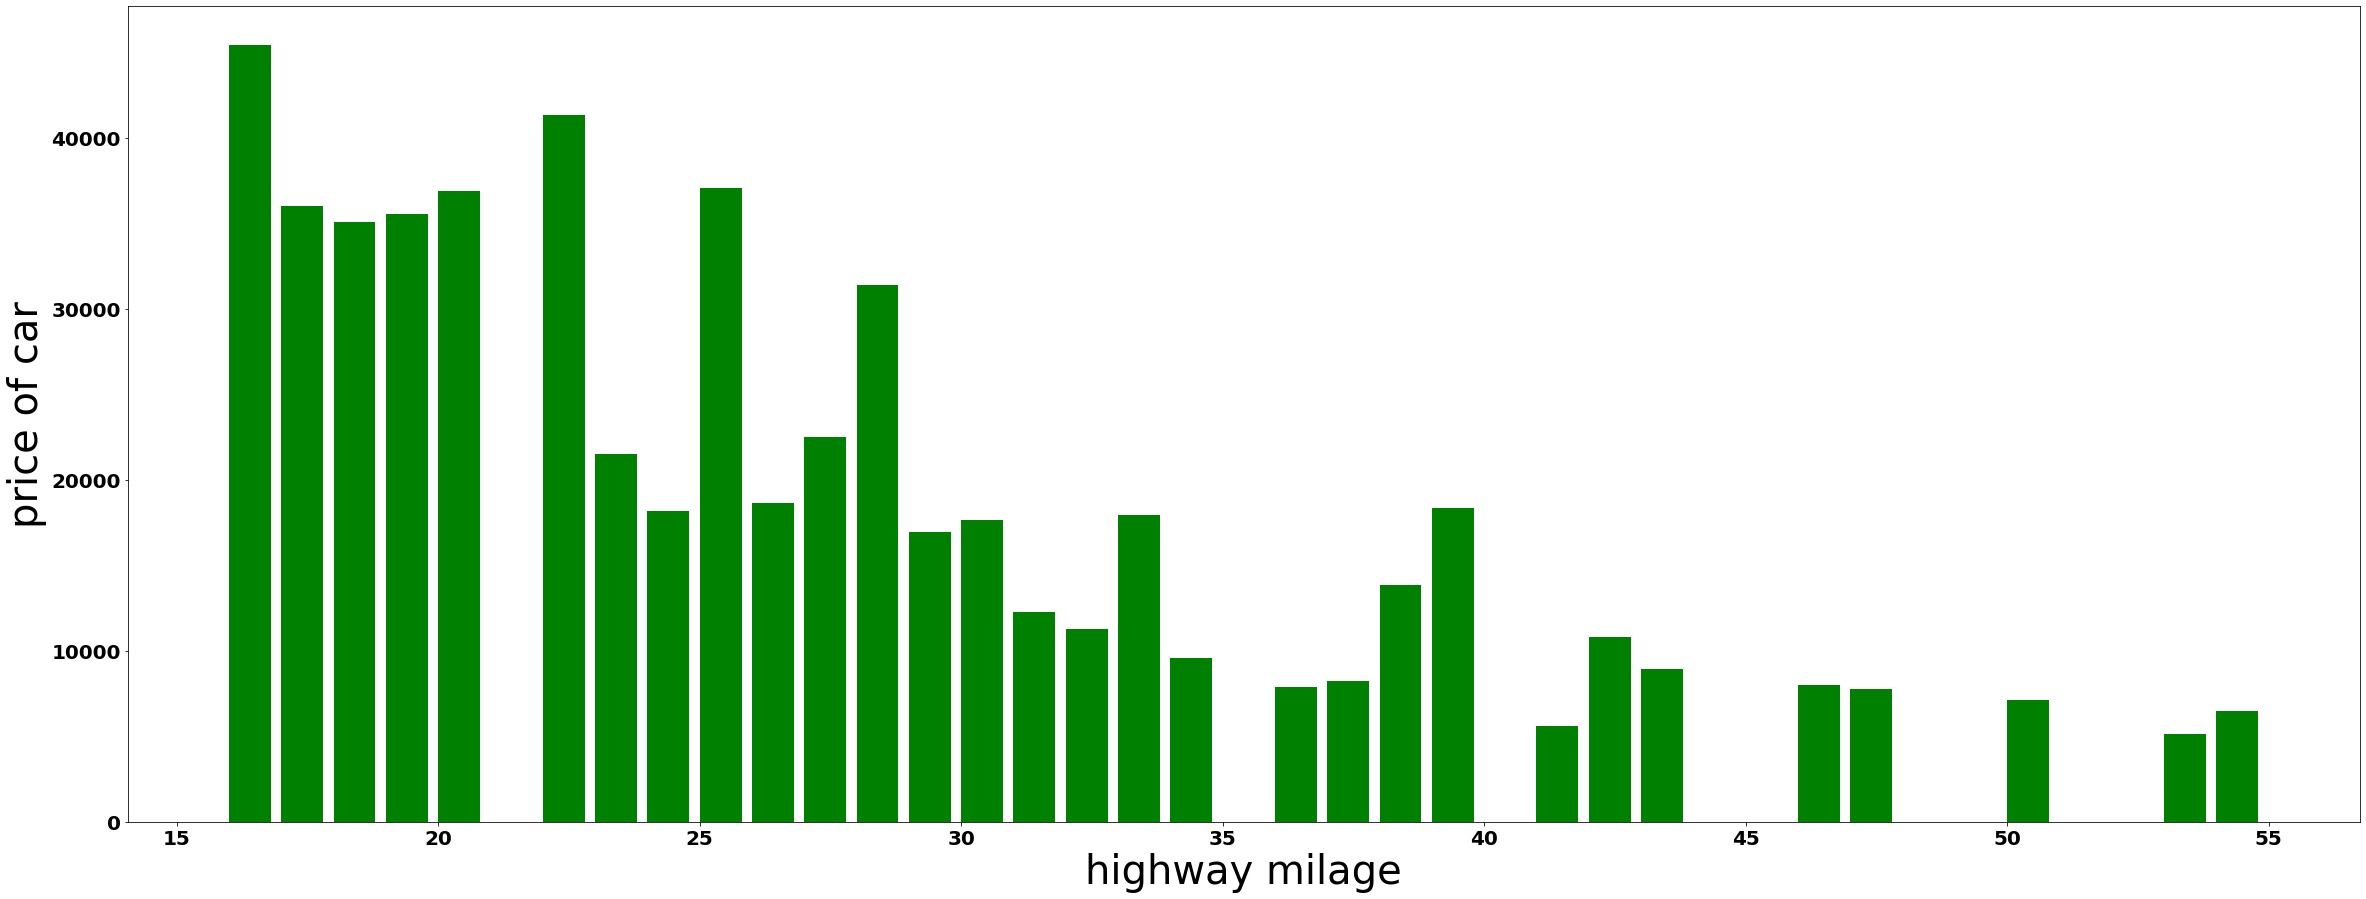

In [16]:
data = pd.DataFrame(df)
y=data['price']
x1 = data['highwaympg']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("highway milage",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x1,y, color='g',align='edge')
plt.show()

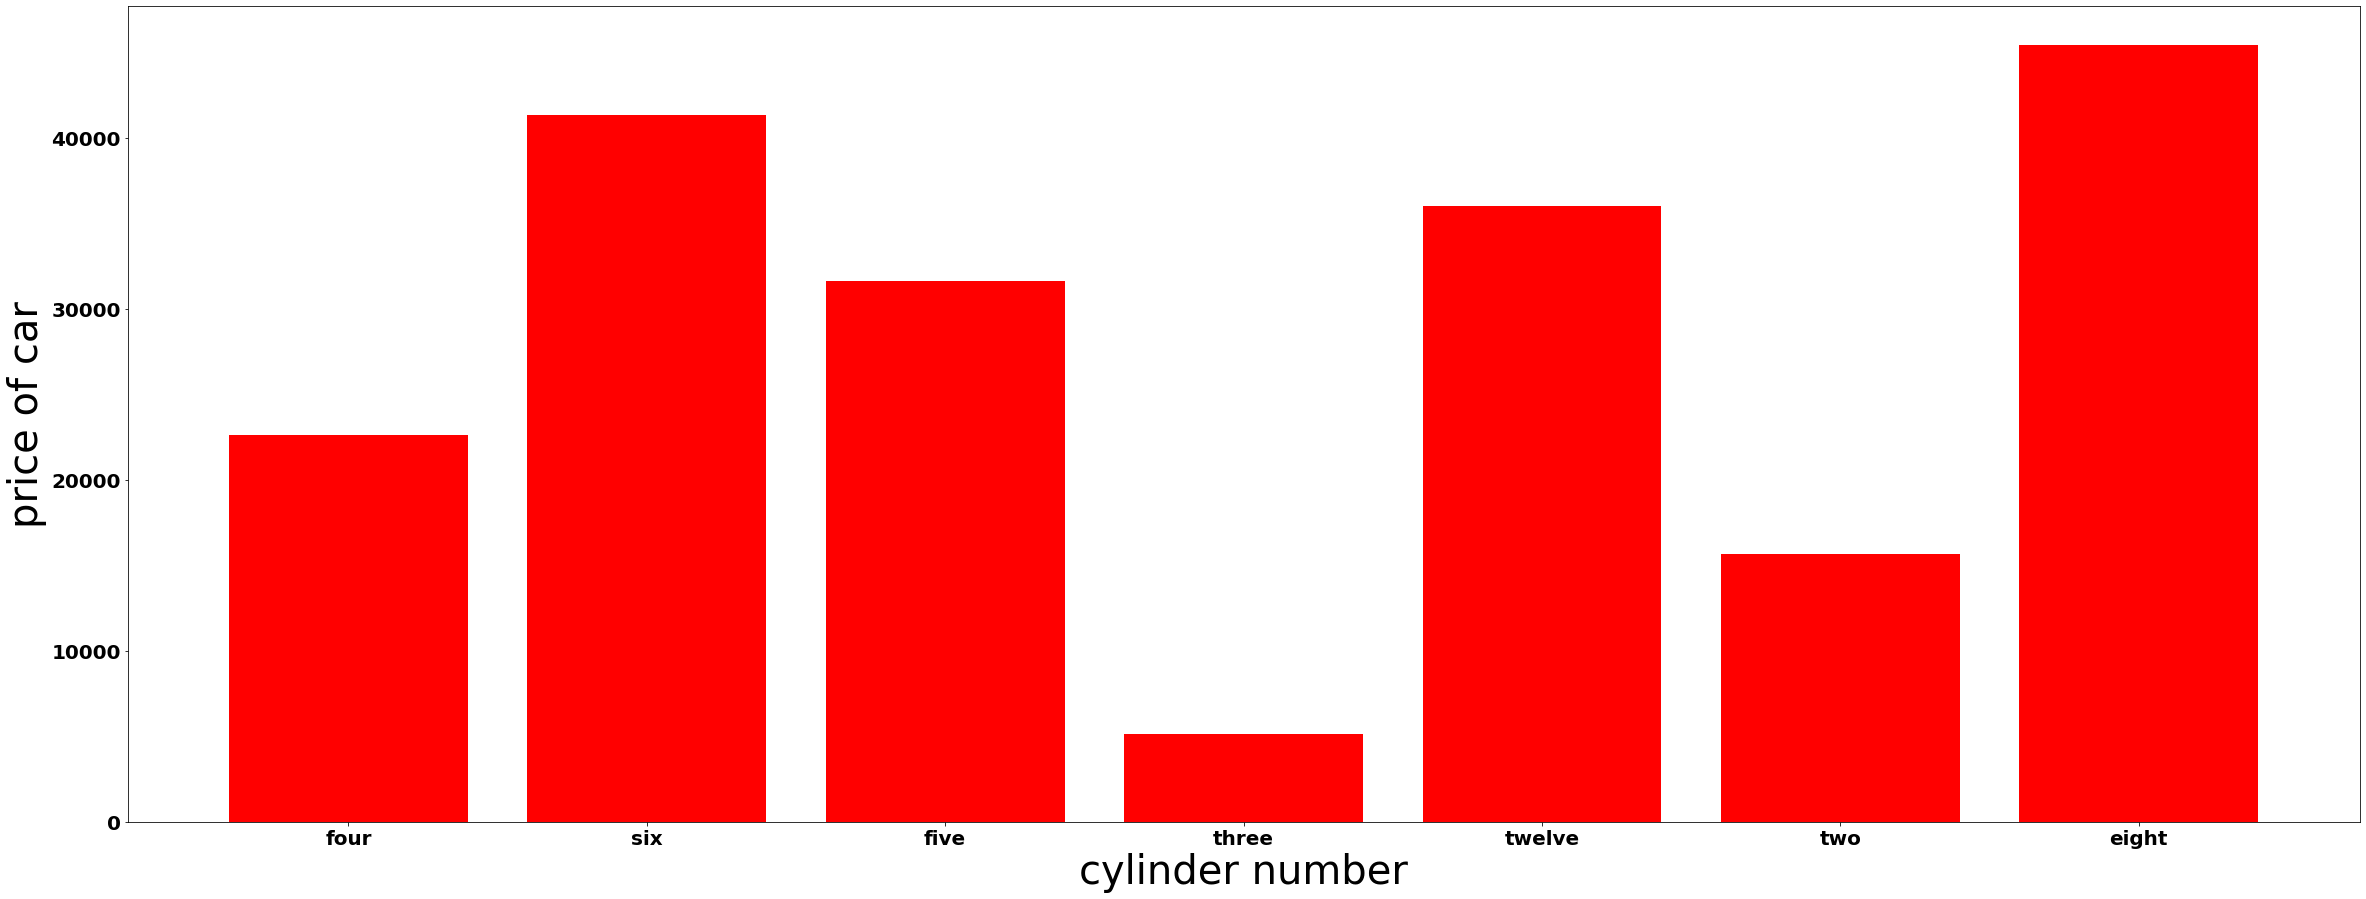

In [17]:
data = pd.DataFrame(df)
y=data['price']
x1 = data['cylindernumber']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("cylinder number",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x1,y, color='r',align='center')
plt.show()

<AxesSubplot:ylabel='price'>

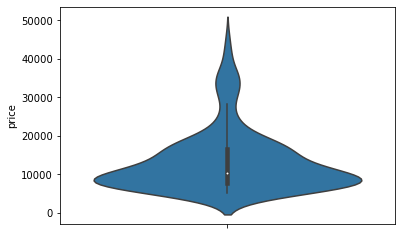

In [18]:
sns.violinplot(data=df,y='price',hue='CarName')

<AxesSubplot:title={'center':'correlation between horsepower and price'}, xlabel='horsepower', ylabel='price'>

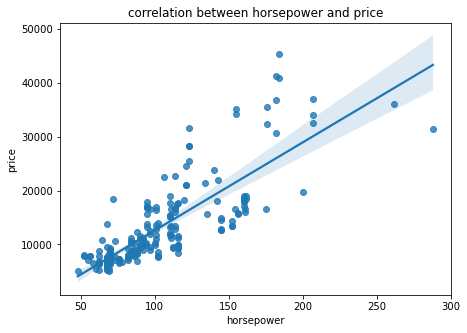

In [19]:
pr= plt.figure(figsize=(7,5))
plt.title("correlation between horsepower and price")
sns.regplot(x="horsepower",y="price",data=df)

In [70]:
p = "price"
data = df[["horsepower", 
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([p], 1))
y = np.array(data[p])

C:\Users\RAMA\AppData\Local\Temp\ipykernel_5672\1378925702.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([p], 1))


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [72]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_test, predictions)

1.0

In [73]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, y_train)
prediction = m.predict(X_train)
model.score(X_test, predictions)

1.0